# Cuarto Examen Parcial (Práctico)
### Laboratorio de Aprendizaje Estadístico

José Armando Melchor Soto  | 745697

--- 




### **Librerías**

In [2024]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import xgboost as xgb 
from xgboost import  XGBRegressor, XGBClassifier, plot_importance as xgb_plot_importance, callback as xgb_callback
from catboost import CatBoostRegressor, CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor,LGBMClassifier, plot_importance,early_stopping, log_evaluation
import shap 
import shap.plots
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display




warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

---

# **Primera Parte**

---

### **Dataset** 
Hr_role

In [2025]:
df = pd.read_csv('Hr_role.csv')

### **Visualización del Dataset**

In [2026]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_satisfied
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,80,1,6,3,3,2,2,2,2,False


In [2027]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,6502.931293,14313.103401,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,4707.956783,7117.786044,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2911.000000,8047.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,4919.000000,14235.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,8379.000000,20461.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,19999.000000,26999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **Explicación de las variables**

| Variable                    | Descripción                                                                 |
| --------------------------- | --------------------------------------------------------------------------- |
| **Age**                     | Edad del empleado.                                                          |
| **Attrition**               | Si el empleado dejó la empresa (`Yes` o `No`).                              |
| **BusinessTravel**          | Frecuencia con la que el empleado viaja por trabajo. |
| **DailyRate**               | Salario diario.                                                             |
| **Department**              | Departamento al que pertenece el empleado.     |
| **DistanceFromHome**        | Distancia entre la casa del empleado y el trabajo. |
| **Education**               | Nivel de educación.                    |
| **EducationField**          | Campo de estudio principal.           |
| **EnvironmentSatisfaction** | Nivel de satisfacción con el ambiente laboral.                 |
| **Gender**                  | Género del empleado (`Male` o `Female`).                                    |
| **StandardHours**           | Número estándar de horas por semana.         |
| **StockOptionLevel**        | Nivel de opciones sobre acciones otorgadas al empleado.          |
| **TotalWorkingYears**       | Años totales de experiencia laboral.                                        |
| **TrainingTimesLastYear**   | Veces que el empleado recibió entrenamiento el último año.                  |
| **WorkLifeBalance**         | Percepción del equilibrio entre vida personal y laboral.       |
| **YearsAtCompany**          | Años que lleva en la empresa.                                               |
| **YearsInCurrentRole**      | Años que lleva en su puesto actual.                                         |
| **YearsSinceLastPromotion** | Años desde su última promoción.                                             |
| **YearsWithCurrManager**    | Años trabajando con su jefe actual.                                         |
| **is\_satisfied**           | Indica si está satisfecho.    |


---

### **Dummies**

In [2028]:
df['Attrition']= df['Attrition'].map({'Yes': 1, 'No': 0})

In [2029]:
df = pd.get_dummies(df, drop_first=True)

In [2030]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,3468,...,True,False,False,False,False,False,False,True,False,False


---

### **NaN's**

In [2031]:
pd.DataFrame(df.isnull().sum()).T

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Si es que hay, usamos la mediana para rellenar

In [2032]:
'''
df['--'] = df['--'].fillna(df['--'].median())
'''

"\ndf['--'] = df['--'].fillna(df['--'].median())\n"

##### Comprobamos que ya no haya NaN's

In [2033]:
pd.DataFrame(df.isnull().sum()).T

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### **Funciones**

##### Función Calibración 

In [2034]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    gropuped = df_calibracion.groupby('bins').mean()
    
    plt.plot(gropuped.predicciones, gropuped.y, label="Modelo", marker="o")
    plt.plot(gropuped.predicciones, gropuped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

##### Función KMeans

In [2035]:
def kmeans(df, columnas, max_clusters=80):
    X = df[columnas].values

    inertias = []
    
    for k in range(1, max_clusters + 1):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('kmeans', KMeans(n_clusters=k, random_state=42))
        ])
        pipeline.fit(X)
        inertia = pipeline.named_steps['kmeans'].inertia_
        inertias.append(inertia)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.title('Método del Codo')
    plt.grid(True)
    plt.show()


##### Función Clusters

In [2036]:
def clusters(df, clusters, comp_x='PC1', comp_y='PC2'):
    df = df.copy().dropna()

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=clusters, random_state=42))
    ])

    pipeline.fit(df)
    df['cluster'] = pipeline.predict(df)

    pca = PCA(n_components=max(6, clusters))
    X_pca = pca.fit_transform(df)

    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    x_components['Cluster'] = df['cluster'] + 1

    plt.figure(figsize=(8, 6))
    plt.scatter(x_components[comp_x], x_components[comp_y], c=x_components['Cluster'])
    plt.xlabel(comp_x)
    plt.ylabel(comp_y)
    plt.title(f'Con {clusters} Clusters visualizados en {comp_x} y {comp_y}')
    plt.show()



##### Función PCA

In [2037]:
def pca(X):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ])

    pipeline.fit(X)
    pca_model = pipeline.named_steps['pca']

    X_pca = pipeline.transform(X)
    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

    plt.plot(pca_model.explained_variance_ratio_, marker='o')
    plt.title('Varianza explicada por componente')
    plt.xlabel('Componente principal')
    plt.ylabel('Varianza explicada')
    plt.grid(True)
    plt.show()

    display((x_components).head())
    return pca_model, pipeline

##### Función PCA Varianza

In [2038]:
def var_pca(X, n_var):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_var)) 
    ])

    pipeline.fit(X)
    objeto_pca = pipeline.named_steps['pca']

    X_pca = pipeline.transform(X)
    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

    plt.plot(objeto_pca.explained_variance_ratio_, marker='o')
    plt.xlabel('Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.title('Varianza Explicada por Componente')
    plt.grid(True)
    plt.show()

    varianza = pd.DataFrame({
        f'PC{i+1}': objeto_pca.explained_variance_ratio_[i] for i in range(n_var)
    }, index=['Varianza']).T

    display(varianza)

    return x_components.head()




##### Función Gráfica n PCA

In [2039]:
def plot_pca(X, comp_x='PC1', comp_y='PC2'):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ])

    pipeline.fit(X)
    objeto_pca = pipeline.named_steps['pca']

    X_pca = pipeline.transform(X)
    x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    
    if comp_x not in x_components.columns or comp_y not in x_components.columns:
        raise ValueError(f"Componentes inválidas: {comp_x}, {comp_y}. Usa nombres como 'PC1', 'PC2', etc.")

    plt.figure(figsize=(8, 6))
    plt.scatter(x_components[comp_x], x_components[comp_y], alpha=1)
    plt.xlabel(comp_x)
    plt.ylabel(comp_y)
    plt.title(f'PCA - Proyección en {comp_x} y {comp_y}')
    plt.grid(True)
    plt.show()


##### Función LightGBM

In [2040]:
def lightgbm(X_train, y_train, X_test, y_test):
    model_lightgbm = LGBMClassifier(
        n_estimators=1000000,
        num_leaves=10,
        learning_rate=0.1,
        max_depth=50,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.5,
        verbosity=-1
    )

    model_lightgbm.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=200)
        ]
    )

    proba_lightgbm = model_lightgbm.predict_proba(X_test)[:, 1]
    
    auc_score = roc_auc_score(y_test, proba_lightgbm)
    print("AUC LightGBM:", auc_score)

    fpr, tpr, _ = roc_curve(y_test, proba_lightgbm)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - LightGBM')
    plt.legend()
    plt.grid(True)
    plt.show()

    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_lightgbm
    })
    
    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades LightGBM')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    importancia = pd.DataFrame({
        'variables': X_train.columns,
        'importancia': model_lightgbm.feature_importances_
    })
    importancia.sort_values('importancia', ascending=True, inplace=True)
    importancia0 = importancia.tail(5)
    importancia0.plot.barh(x='variables', y='importancia', figsize=(8, 6))
    plt.xlabel('Importancia')
    plt.title('Top 5 Feature Importances')
    plt.grid(True)
    plt.show()

    return auc_score


##### Función Shap LightGBM

In [2041]:
def shapLGBM(X_train, y_train, X_test, y_test):
    model_shap = LGBMClassifier(
        n_estimators=1000000,
        num_leaves=10,
        learning_rate=0.1,
        max_depth=50,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.5,
        verbosity=-1
    )
    model_shap.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=200)
        ]
    )
    proba_ShapLGBM = model_shap.predict_proba(X_test)[:, 1]
    
    auc_score0 = roc_auc_score(y_test, proba_ShapLGBM)
    print(f"Shap LightGBM: {auc_score0:.4f}")

    fpr, tpr, _ = roc_curve(y_test, proba_ShapLGBM)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_score0:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - LightGBM')
    plt.legend()
    plt.grid(True)
    plt.show()

    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_ShapLGBM
    })
    
    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades LightGBM')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    importancia = pd.DataFrame({
        'variables': X_train.columns,
        'importancia': model_shap.feature_importances_
    })
    importancia.sort_values('importancia', ascending=True, inplace=True)
    importancia0 = importancia.tail(5)
    importancia0.plot.barh(x='variables', y='importancia', figsize=(8, 6))
    plt.xlabel('Importancia')
    plt.title('Top 5 Feature Importances')
    plt.grid(True)
    plt.show()

    sample_size = min(10000, len(X_test))
    X_shap = X_test.sample(sample_size, random_state=42)

    explainer = shap.TreeExplainer(model_shap)
    shap_values = explainer.shap_values(X_shap)

    shap.initjs()

    shap.waterfall_plot(shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_shap.iloc[0],
        feature_names=X_shap.columns
    ))

    plt.title('Top 5 Variables más importantes (Barplot)')
    shap.summary_plot(shap_values, X_shap, plot_type="bar", max_display=5)

    plt.title('Top 10 Variables con mayor impacto (Dotplot)')
    shap.summary_plot(shap_values, X_shap, plot_type="dot", max_display=10)

    return auc_score0


##### Función LightGBM/PCA
 

In [2042]:
def pcaLGBM(X_train, y_train, X_test, y_test, componentes):

    X_train_sel = X_train[componentes]
    X_test_sel = X_test[componentes]

    model_pcaLGBM = LGBMClassifier(
        n_estimators=10000,
        num_leaves=10,
        learning_rate=0.2,
        max_depth=100,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.5,
        verbosity=-1
    )
    
    model_pcaLGBM.fit(
        X_train_sel, y_train,
        eval_set=[(X_train_sel, y_train), (X_test_sel, y_test)],
        eval_metric='auc',
        callbacks=[
            early_stopping(stopping_rounds=100),
            log_evaluation(period=100)
        ]
    )
    
    proba_pcaLGM = model_pcaLGBM.predict_proba(X_test_sel)[:, 1]
    auc_score = roc_auc_score(y_test, proba_pcaLGM)

    fpr, tpr, _ = roc_curve(y_test, proba_pcaLGM)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - LightGBM')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    calibracion(proba_pcaLGM, y_test, 10)
    
    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_pcaLGM
    })
    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades LightGBM')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    importancia = pd.DataFrame({
        'variables': X_train_sel.columns,
        'importancia': model_pcaLGBM.feature_importances_
    })
    importancia.sort_values('importancia', ascending=True, inplace=True)
    importancia.tail(5).plot.barh(x='variables', y='importancia', figsize=(8,6))
    plt.xlabel('Importancia')
    plt.title('Top 5 Feature Importances')
    plt.grid(True)
    plt.show()

    
    
    print("AUC PCA LGBM:", auc_score)
    return auc_score

##### Función S learner
 


In [2043]:
def Slearner(X_train, y_train, X_test, y_test):
    model_Slearner = LGBMClassifier(
        n_estimators=1000000,
        num_leaves=10,
        learning_rate=0.1,
        max_depth=50,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.5,
        verbosity=-1
    )

    model_Slearner.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=200)
        ]
    )

    proba_Slearner = model_Slearner.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, proba_Slearner)

    X_test_counter_0 = X_test.copy()
    X_test_counter_0['smoking_history'] = 0

    X_test_counter_1 = X_test.copy()
    X_test_counter_1['smoking_history'] = 1

    df_cate = pd.DataFrame({
        'treatment0': model_Slearner.predict_proba(X_test_counter_0)[:, 1],
        'treatment1': model_Slearner.predict_proba(X_test_counter_1)[:, 1]
    })

    df_cate['cate'] = df_cate['treatment1'] - df_cate['treatment0']
    df_cate['bin_cate'] = pd.qcut(df_cate['cate'], q=5, labels=False) + 1
    df_cate['diabetes_%'] = y_test

    print("CATE grouped by quantiles:")
    display(df_cate.groupby('bin_cate').mean())

    fpr, tpr, _ = roc_curve(y_test, proba_Slearner)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - LightGBM')
    plt.legend()
    plt.grid(True)
    plt.show()

    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_Slearner
    })

    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades LightGBM')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("AUC S learn:", auc_score)
    return auc_score

    

##### Función T learner

In [ ]:
def Tlearner(X_train, y_train, X_test, y_test):
    X_train_1 = X_train[X_train['smoking_history'] == 1]
    y_train_1 = y_train.loc[X_train_1.index]

    X_train_0 = X_train[X_train['smoking_history'] == 0]
    y_train_0 = y_train.loc[X_train_0.index]

    model_T0 = LGBMClassifier(
        n_estimators=1000,
        num_leaves=10,
        learning_rate=0.1,
        max_depth=50,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.5,
        verbosity=-1
    )

    model_T0.fit(
        X_train_0, y_train_0,
        eval_set=[(X_train_0, y_train_0)],
        eval_metric='auc',
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=200)
        ]
    )
    proba_T0 = model_T0.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, proba_T0)

    fpr, tpr, _ = roc_curve(y_test, proba_T0)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'T learner 0 (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - LightGBM')
    plt.legend()
    plt.grid(True)
    plt.show()

    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_T0
    })

    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades T learner 0')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("AUC T learner 0:", auc_score)


# ----------
    model_T1 = LGBMClassifier(
        n_estimators=1000,
        num_leaves=10,
        learning_rate=0.1,
        max_depth=50,
        reg_lambda=0.1,
        subsample=0.5,
        colsample_bytree=0.5,
        verbosity=-1
    )

    model_T1.fit(
        X_train_1, y_train_1,
        eval_set=[(X_train_1, y_train_1)],
        eval_metric='auc',
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=200)
        ]
    )

    proba_T1 = model_T1.predict_proba(X_test)[:, 1]
    auc_score1 = roc_auc_score(y_test, proba_T1)

    fpr, tpr, _ = roc_curve(y_test, proba_T1)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'T learner 1 (AUC = {auc_score1:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - T learner 1')
    plt.legend()
    plt.grid(True)
    plt.show()

    juntar = pd.DataFrame({
        'real': y_test,
        'probabilidades': proba_T1
    })

    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
    plt.title('Histograma de probabilidades T learner 1')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("AUC T learner 1:", auc_score1)


    df_cate = pd.DataFrame({
        'treatment0': model_T0.predict_proba(X_test)[:, 1],
        'treatment1': model_T1.predict_proba(X_test)[:, 1]
    })

    df_cate['cate'] = df_cate['treatment1'] - df_cate['treatment0']
    df_cate['bin_cate'] = pd.qcut(df_cate['cate'], q=5, labels=False) + 1
    df_cate['diabetes_%'] = y_test.reset_index(drop=True)

    display(df_cate.groupby('bin_cate').mean())
    display(df_cate['cate'].describe())

    return auc_score,auc_score1


##### Función X learner

In [2072]:
def Xlearner(X_train, y_train, X_test, y_test):

    X_train_smoke1 = X_train[X_train['smoking_history'] == 1]
    y_train_smoke1 = y_train.loc[X_train_smoke1.index]

    X_train_smoke0 = X_train[X_train['smoking_history'] == 0]
    y_train_smoke0 = y_train.loc[X_train_smoke0.index]

    y_train_smoke = X_train['smoking_history'].reset_index(drop=True)
    y_test_smoke = X_test['smoking_history'].reset_index(drop=True)

    model_t0 = LGBMClassifier(n_estimators=1000, learning_rate=0.1, num_leaves=10, max_depth=5, verbosity=-1)
    model_t0.fit(X_train_smoke0, y_train_smoke0)
    proba_T0 = model_t0.predict_proba(X_test)[:, 1]

    model_t1 = LGBMClassifier(n_estimators=1000, learning_rate=0.1, num_leaves=10, max_depth=5, verbosity=-1)
    model_t1.fit(X_train_smoke1, y_train_smoke1)
    proba_T1 = model_t1.predict_proba(X_test)[:, 1]

    auc_0 = roc_auc_score(y_test, proba_T0)
    auc_1 = roc_auc_score(y_test, proba_T1)

    for proba, auc_val, label in [
        (proba_T0, auc_0, 'X learner 0'),
        (proba_T1, auc_1, 'X learner 1')
    ]:
        fpr, tpr, _ = roc_curve(y_test, proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_val:.3f})')
        plt.plot([0, 1], [0, 1], 'r--', label='Clasificador aleatorio')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {label} - LightGBM')
        plt.legend()
        plt.grid(True)
        plt.show()

        juntar = pd.DataFrame({'real': y_test, 'probabilidades': proba})
        plt.figure(figsize=(10, 5))
        plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label='1')
        plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label='0')
        plt.title(f'Histograma de probabilidades {label}')
        plt.xlabel('Probabilidad')
        plt.ylabel('Densidad')
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"AUC {label}:", auc_val)

    D0 = y_train_smoke1 - model_t0.predict_proba(X_train_smoke1)[:, 1]
    D1 = model_t1.predict_proba(X_train_smoke0)[:, 1] - y_train_smoke0

    mD0 = LGBMRegressor(n_estimators=10000, num_leaves=10, max_depth=5, learning_rate=0.1,
                        colsample_bytree=0.8, subsample=0.8, metric='rmse', verbosity=-1)
    mD0.fit(X_train_smoke1, D0)
    pred_mD0 = mD0.predict(X_test)

    mD1 = LGBMRegressor(n_estimators=10000, num_leaves=10, max_depth=5, learning_rate=0.1,
                        colsample_bytree=0.8, subsample=0.8, metric='rmse', verbosity=-1)
    mD1.fit(X_train_smoke0, D1)
    pred_mD1 = mD1.predict(X_test)

    X_train_ps = X_train.drop('smoking_history', axis=1)
    X_test_ps = X_test.drop('smoking_history', axis=1)

    propensity_model = LGBMClassifier(
        n_estimators=1000, num_leaves=10, learning_rate=0.1, max_depth=50,
        reg_lambda=0.1, subsample=0.5, colsample_bytree=0.5, verbosity=-1
    )

    propensity_model.fit(
        X_train_ps, y_train_smoke,
        eval_set=[(X_train_ps, y_train_smoke), (X_test_ps, y_test_smoke)],
        eval_metric='auc',
        callbacks=[early_stopping(200), log_evaluation(200)]
    )

    propensity_score = propensity_model.predict_proba(X_test_ps)[:, 1]

    plt.hist(propensity_score, bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribución del Propensity Score")
    plt.xlabel("Propensity Score")
    plt.ylabel("Frecuencia")
    plt.show()

    cate = propensity_score * pred_mD1 + (1 - propensity_score) * pred_mD0
    df_cate = pd.DataFrame({'cate': cate})
    df_cate['bin_cate'] = pd.qcut(df_cate['cate'], q=5, labels=False) + 1
    df_cate['diabetes_%'] = y_test.reset_index(drop=True)

    display(df_cate.head())
    display(df_cate.groupby('bin_cate').mean())
    display(df_cate['cate'].describe())

    return  auc_0, auc_1


---

### **Modelo**

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

In [2046]:
target= 'Attrition'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

---

#### **Correlación del target con todas las variables**

In [2047]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences      

In [2048]:
df.drop('StandardHours', axis=1, inplace=True)

---

## **Modelos**

### PCA

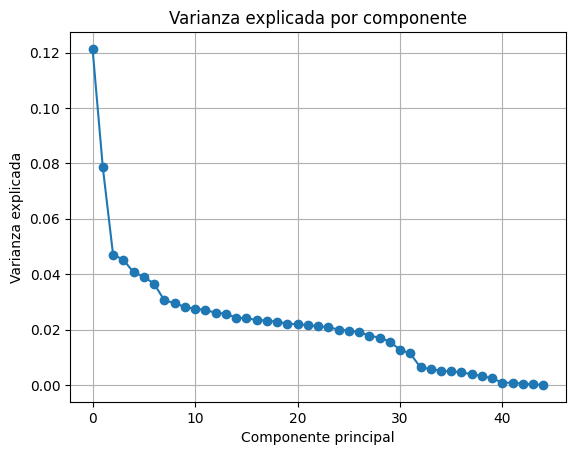

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-0.032572,2.291182,0.793191,-2.052578,-0.317374,-0.110203,2.249507,1.243813,0.886021,-1.572228,...,-0.126584,0.164934,0.039706,0.550329,0.121724,0.061854,-0.023872,-0.017401,0.008032,-3.385597e-16
1,0.095676,-1.574597,0.688515,2.745892,2.795041,1.505989,0.814421,0.308180,-0.935298,0.041763,...,-0.480337,0.036832,-0.153900,0.214914,0.598078,-0.058448,-0.091334,-0.002346,-0.010296,7.943563e-16
2,-2.866842,-1.005022,0.511254,-2.039444,-0.191831,-0.796215,-0.349952,-0.806574,1.155798,2.828999,...,-0.419048,0.220208,0.336070,0.033592,-0.136736,-0.063498,-0.079978,-0.031230,0.016695,7.227427e-16
3,-1.216678,-1.138875,0.708268,1.148569,-1.043963,2.524247,1.022541,1.814230,-1.364917,-0.612262,...,0.576902,-0.284522,0.362471,0.070388,-0.059998,0.021935,0.037192,0.004840,-0.012791,8.588709e-16
4,-2.077853,-1.222251,-1.604687,-0.578037,-1.086934,-0.129475,-1.866160,-1.622411,1.374715,0.181979,...,0.092113,0.139018,0.051712,-0.035541,0.045509,0.059128,0.134617,-0.008344,-0.031498,-3.318212e-15


(PCA(), Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())]))

In [2049]:
pca(X)

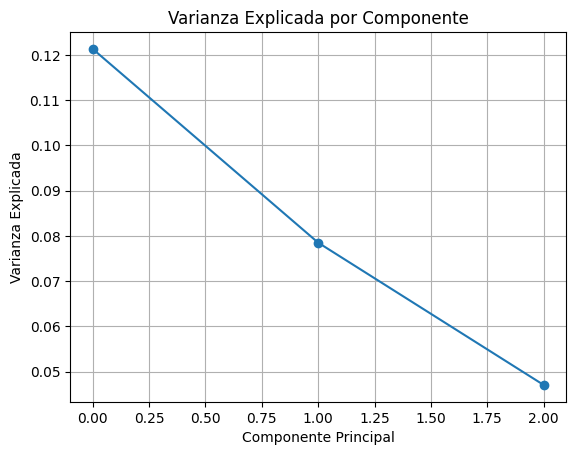

,Varianza
PC1,0.121305
PC2,0.078496
PC3,0.047062


,PC1,PC2,PC3
0,-0.032572,2.291182,0.793191
1,0.095676,-1.574597,0.688515
2,-2.866842,-1.005022,0.511254
3,-1.216678,-1.138875,0.708268
4,-2.077853,-1.222251,-1.604687


In [2050]:
var_pca(X,3)

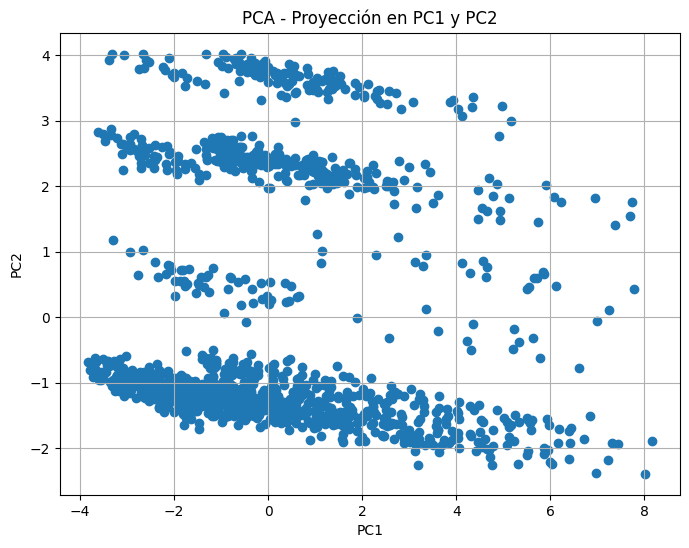

In [2051]:
plot_pca(X, 'PC1', 'PC2')

---

### KMeans

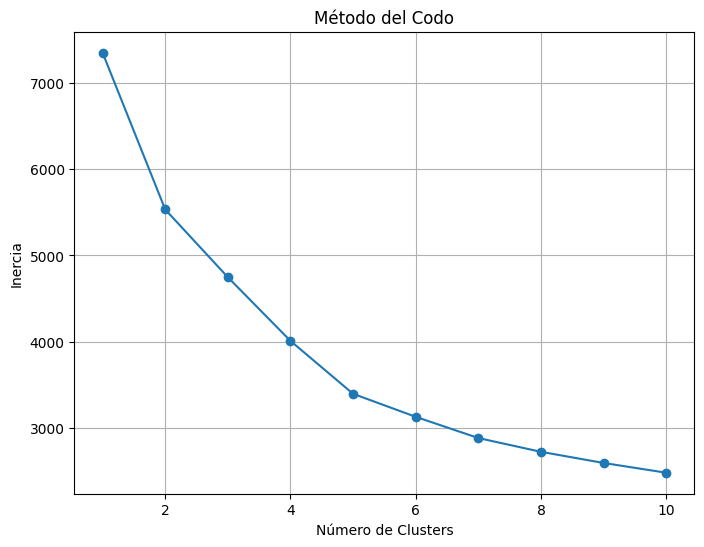

In [2052]:
kmeans(X, ['DistanceFromHome', 'Age', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear'], 10)


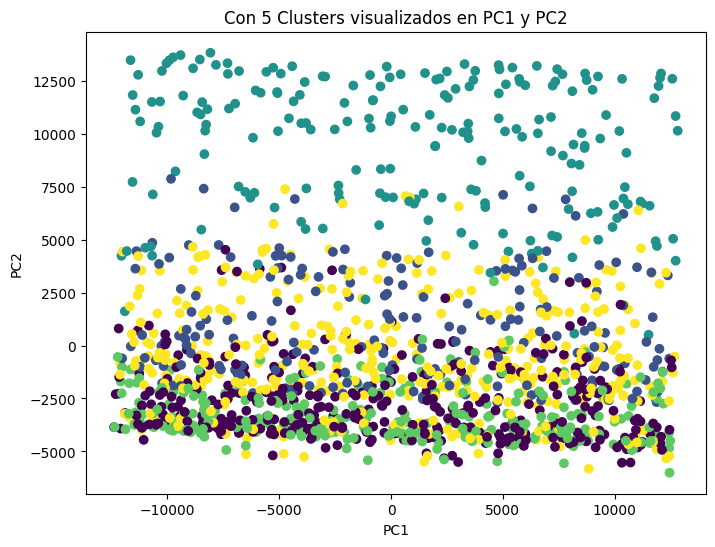

In [2053]:
clusters(X, 5, 'PC1', 'PC2')

---

### LightGBM

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 1	training's binary_logloss: 0.0563464	valid_1's auc: 0.782582	valid_1's binary_logloss: 0.410293
Early stopping, best iteration is:
[59]	training's auc: 0.983677	training's binary_logloss: 0.181705	valid_1's auc: 0.80429	valid_1's binary_logloss: 0.351961
AUC LightGBM: 0.8042897751744337


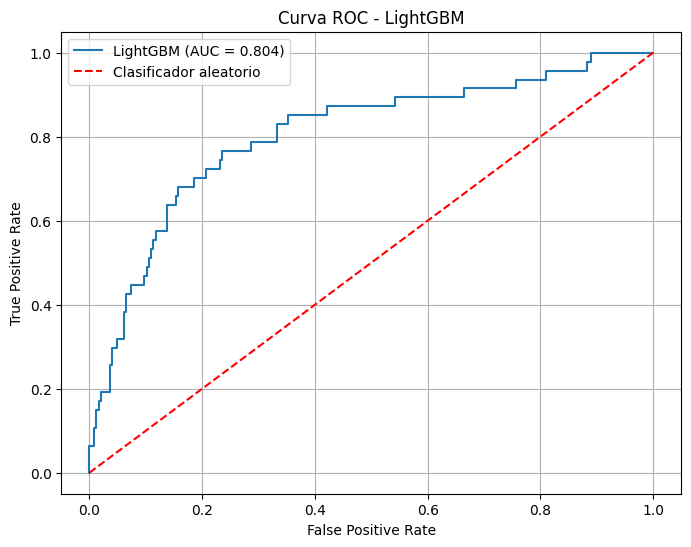

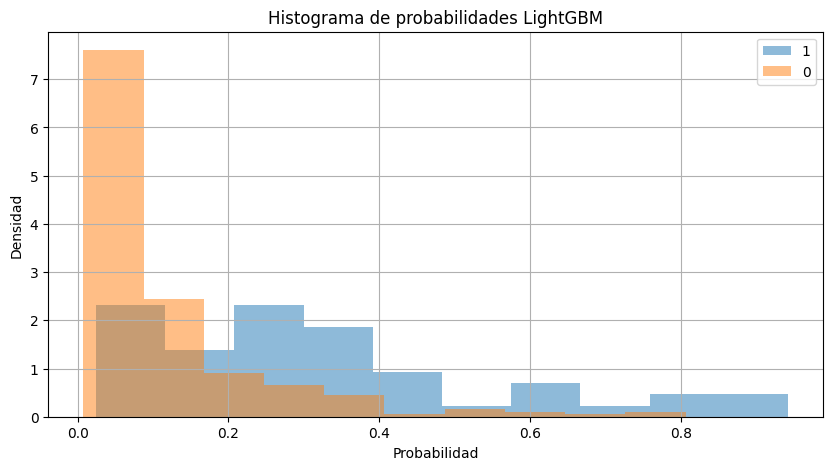

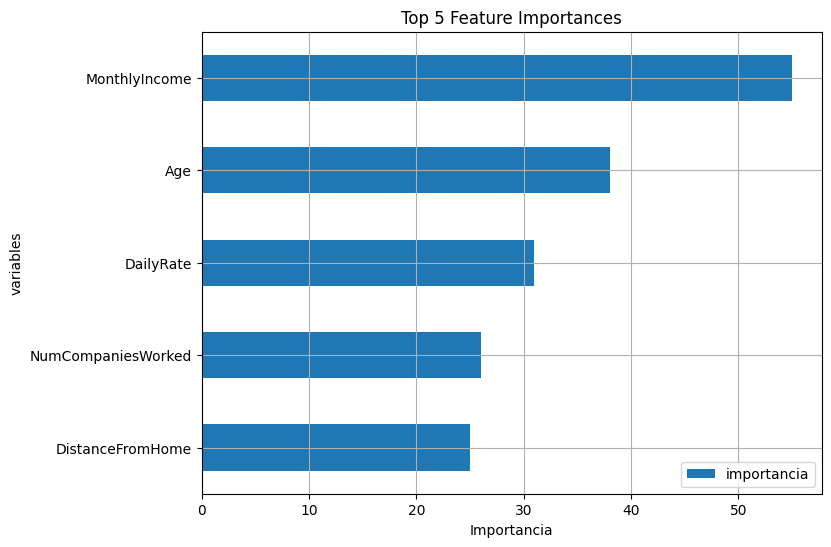

In [2054]:
predicciones_LGBM= lightgbm(X_train, y_train, X_test, y_test)

### Shap LightGBM

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 1	training's binary_logloss: 0.0563464	valid_1's auc: 0.782582	valid_1's binary_logloss: 0.410293
Early stopping, best iteration is:
[59]	training's auc: 0.983677	training's binary_logloss: 0.181705	valid_1's auc: 0.80429	valid_1's binary_logloss: 0.351961
Shap LightGBM: 0.8043


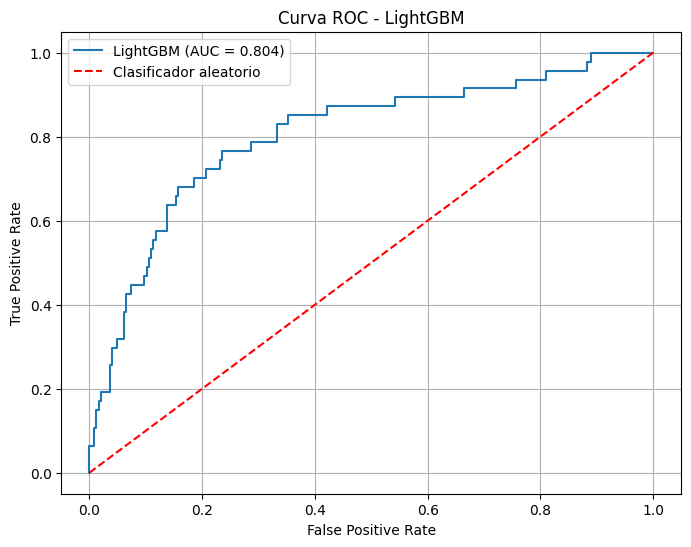

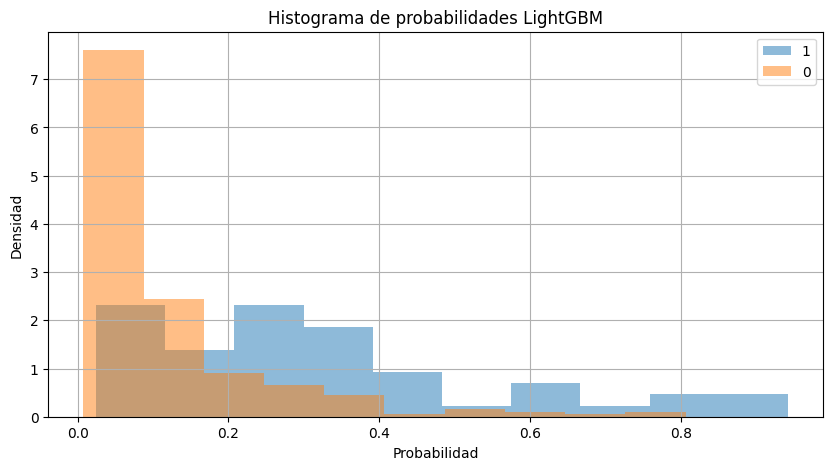

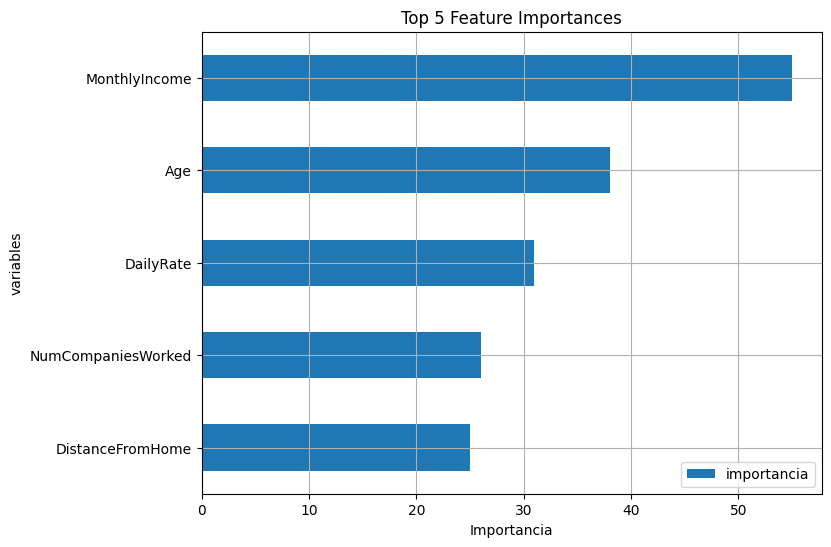

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


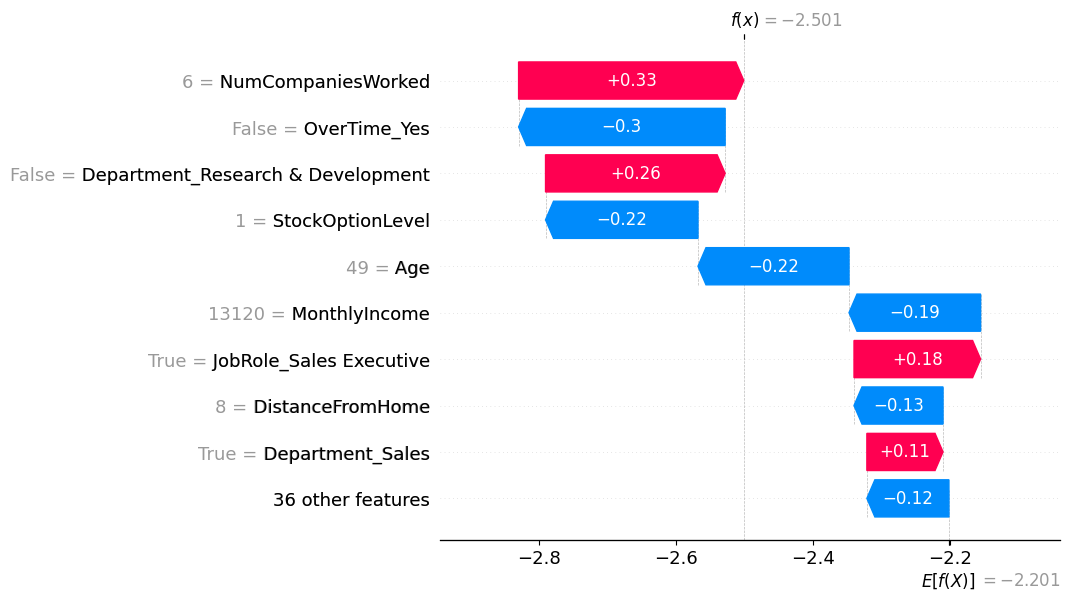

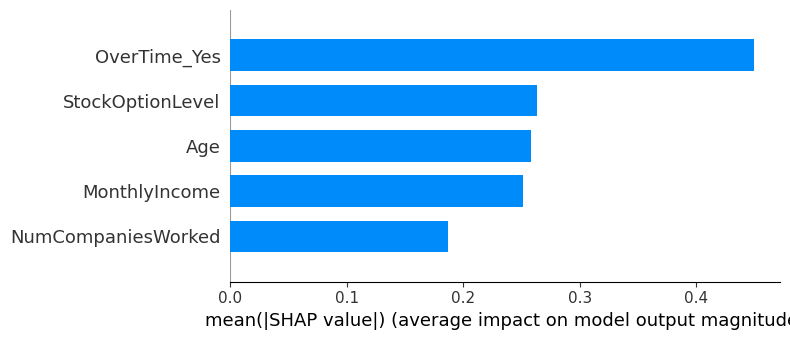

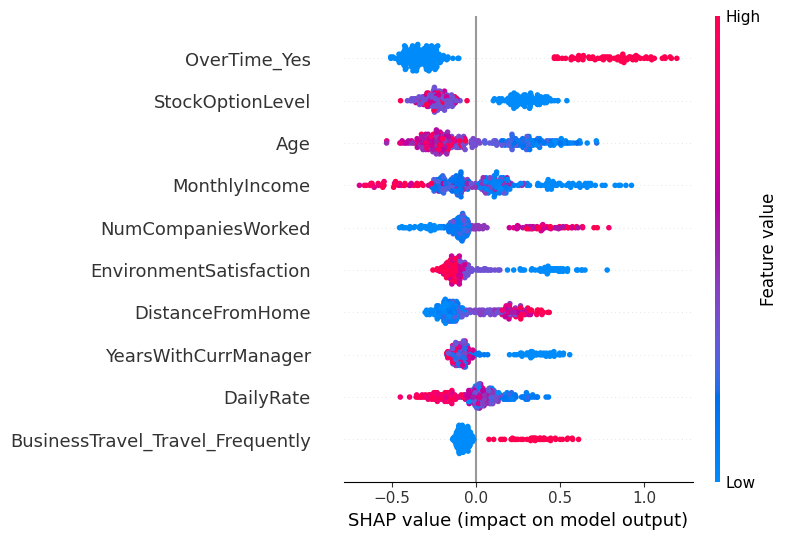

In [2055]:
predicciones_ShapLGBM = shapLGBM(X_train, y_train, X_test, y_test)

### LightGBM PCA

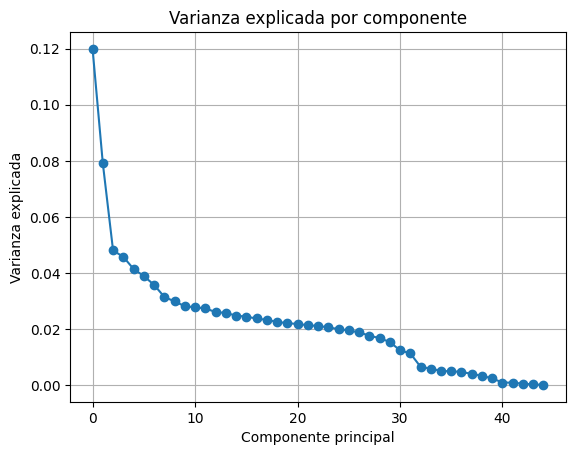

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,3.268377,0.797702,-2.813327,2.360792,1.563957,1.008804,-0.828860,-0.183150,-0.345417,0.518755,...,-0.120738,0.463191,0.903612,-0.872022,-0.367539,-0.634369,0.518427,0.123995,0.098900,-9.756633e-16
1,-3.061028,-0.772828,-1.164322,-0.810014,-1.435877,-0.447003,-0.537642,-1.299993,-0.384818,1.076537,...,0.134468,-0.035479,0.266525,-0.139764,-0.027181,-0.017708,-0.030435,-0.008335,-0.011893,-1.314085e-17
2,4.798460,2.055625,-1.272550,0.386055,-0.652197,-0.177050,0.202280,-1.252751,-0.326813,2.149298,...,-0.706315,0.426057,0.334040,-0.633175,0.107263,-0.483474,0.676821,0.091644,0.058895,7.169713e-17
3,-1.638532,2.389779,-0.031717,-0.695422,-1.584669,-0.825712,1.202834,-1.918366,-1.530688,0.949906,...,0.331592,-0.252692,-0.195279,-0.229952,-0.085967,0.030525,-0.041518,0.009522,0.009913,9.705124e-16
4,0.309785,-1.523335,0.762076,-1.063476,-0.461554,2.097289,1.926476,0.263775,1.283149,-0.603099,...,-0.543956,-0.635474,-0.269026,-0.382147,0.665076,-0.017814,0.003373,0.006708,-0.008419,-1.149810e-16


Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.895319	training's binary_logloss: 0.288917	valid_1's auc: 0.539151	valid_1's binary_logloss: 0.548666
Early stopping, best iteration is:
[3]	training's auc: 0.772958	training's binary_logloss: 0.398874	valid_1's auc: 0.623008	valid_1's binary_logloss: 0.430065


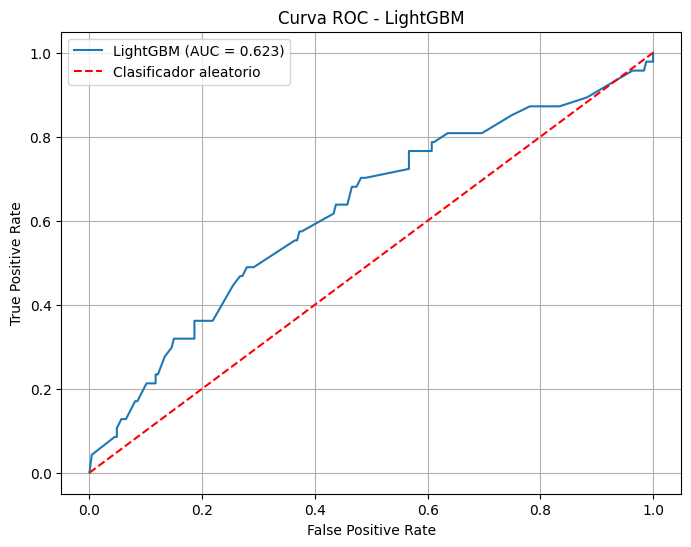

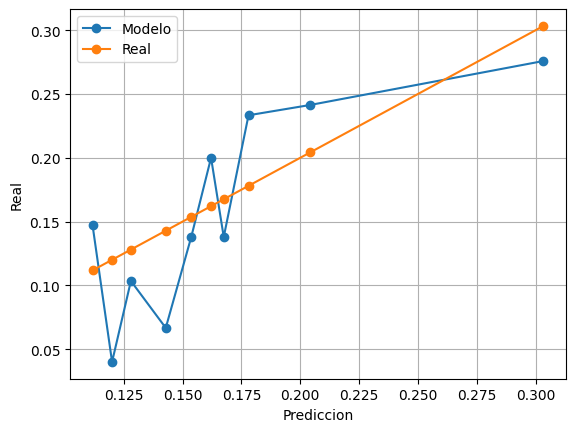

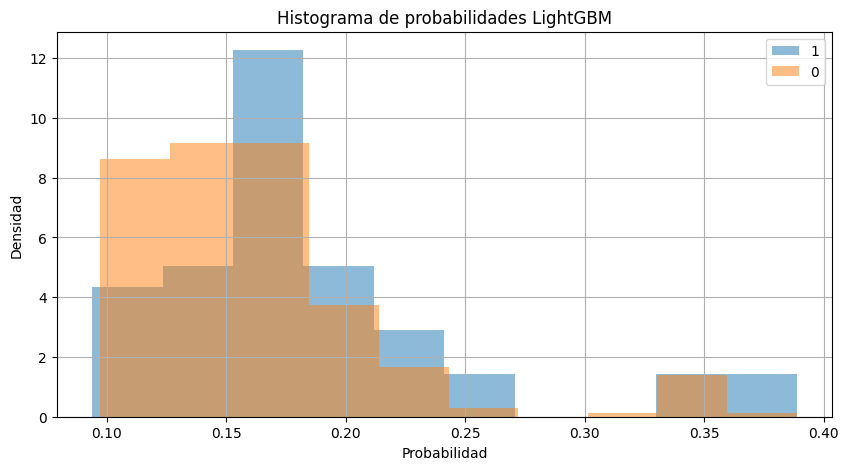

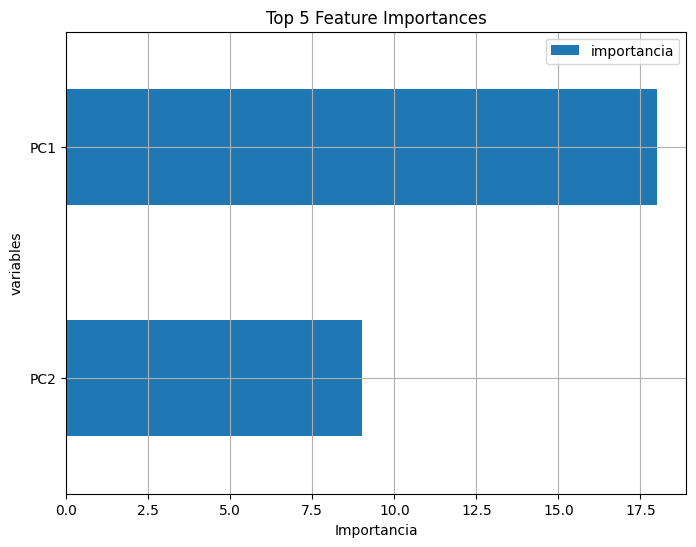

AUC PCA LGBM: 0.6230080110259283


In [2056]:
# Perform PCA on X_train and X_test
pca_model, pipeline = pca(X_train)
x_comp_train = pipeline.transform(X_train)
x_comp_test = pipeline.transform(X_test)

# Convert PCA-transformed data into DataFrames for compatibility
x_comp_train = pd.DataFrame(x_comp_train, columns=[f'PC{i+1}' for i in range(x_comp_train.shape[1])])
x_comp_test = pd.DataFrame(x_comp_test, columns=[f'PC{i+1}' for i in range(x_comp_test.shape[1])])

# Call the pcaLGBM function with the PCA-transformed data
predicciones_PCALGBM= pcaLGBM(x_comp_train, y_train, x_comp_test, y_test, ['PC1', 'PC2'])

---

# **Parte 2**

---

### **Dataset** 
Diabetes

In [2057]:
df = pd.read_csv('Diabetes.csv')

### **Visualización del Dataset**

In [2058]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,diabetes
0,Female,80.0,0,1,never,25.19,0
1,Female,54.0,0,0,No Info,27.32,0
2,Male,28.0,0,0,never,27.32,0
3,Female,36.0,0,0,current,23.45,0
4,Male,76.0,1,1,current,20.14,0


In [2059]:
df.describe()

,age,hypertension,heart_disease,bmi,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,0.085000
std,22.516840,0.26315,0.194593,6.636783,0.278883
min,0.080000,0.00000,0.000000,10.010000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,0.000000
max,80.000000,1.00000,1.000000,95.690000,1.000000


### **Explicación de las variables**

| Variable             | Descripción                                                                   |
| -------------------- | ----------------------------------------------------------------------------- |
| **gender**           | Básicamente indica el sexo biológico del paciente (`Male` o `Female`).                            |
| **age**              | Edad del paciente.                                                            |
| **hypertension**     | Indica si el paciente tiene hipertensión o no (`1` o `0`).                 |
| **heart\_disease**   | Indica si el paciente tiene una enfermedad en el corazón o no (`1` o `0`). |
| **smoking\_history** | Indica si el paciente ha fumado o no.                                         |
| **never**            | El paciente nunca ha fumado.                                                  |
| **current**          | El paciente actualmente fuma.                                                 |
| **No Info**          | No se tiene información sobre el historial de tabaquismo del paciente.        |
| **bmi**              | Índice de masa corporal, que indica el peso en relación a la altura.          |
| **diabetes**         | Indica si el paciente tiene diabetes o no (`1` o `0`).                     |


---

### **Dummies**

In [2060]:
df['smoking_history'] = df['smoking_history'].map({'No Info': 0, 'never': 0, 'former': 1, 
                                                       'current': 1, 'not current': 1, 'ever':1})

In [2061]:
df = pd.get_dummies(df, drop_first=True)

In [2062]:
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Male,gender_Other
0,80.0,0,1,0,25.19,0,False,False
1,54.0,0,0,0,27.32,0,False,False
2,28.0,0,0,0,27.32,0,True,False
3,36.0,0,0,1,23.45,0,False,False
4,76.0,1,1,1,20.14,0,True,False


---

### **NaN's**

In [2063]:
pd.DataFrame(df.isnull().sum()).T

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Male,gender_Other
0,0,0,0,0,0,0,0,0


##### Si es que hay, usamos la mediana para rellenar

In [2064]:
'''
df['--'] = df['--'].fillna(df['--'].median())
'''

"\ndf['--'] = df['--'].fillna(df['--'].median())\n"

##### Comprobamos que ya no haya NaN's

In [2065]:
pd.DataFrame(df.isnull().sum()).T

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Male,gender_Other
0,0,0,0,0,0,0,0,0


---

### **Modelo**

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

In [2066]:
target= 'diabetes'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

---

### **Correlación del target con todas las variables**

In [2067]:
df.corr()['diabetes'].sort_values(ascending=False)

diabetes           1.000000
age                0.258008
bmi                0.214357
hypertension       0.197823
heart_disease      0.171727
smoking_history    0.096907
gender_Male        0.037666
gender_Other      -0.004090
Name: diabetes, dtype: float64

In [2068]:
df.drop('gender_Other', axis=1, inplace=True)

---

## **Modelos**

### S learner

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.840209	training's binary_logloss: 0.225656	valid_1's auc: 0.837082	valid_1's binary_logloss: 0.227369
Early stopping, best iteration is:
[141]	training's auc: 0.838371	training's binary_logloss: 0.226567	valid_1's auc: 0.837204	valid_1's binary_logloss: 0.227299
CATE grouped by quantiles:


,treatment0,treatment1,cate,diabetes_%
bin_cate,,,,
1,0.008688,0.010185,0.001497,0.097944
2,0.016017,0.020936,0.004919,0.081481
3,0.060733,0.071985,0.011253,0.091346
4,0.121038,0.144119,0.023081,0.062578
5,0.186613,0.228701,0.042088,0.069307


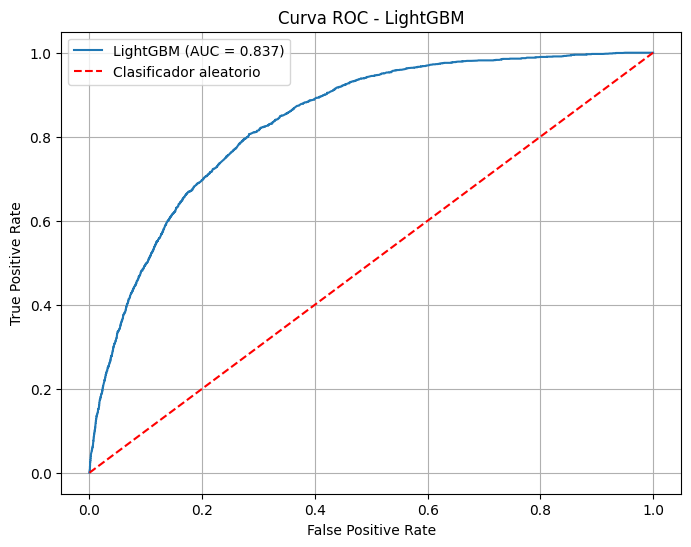

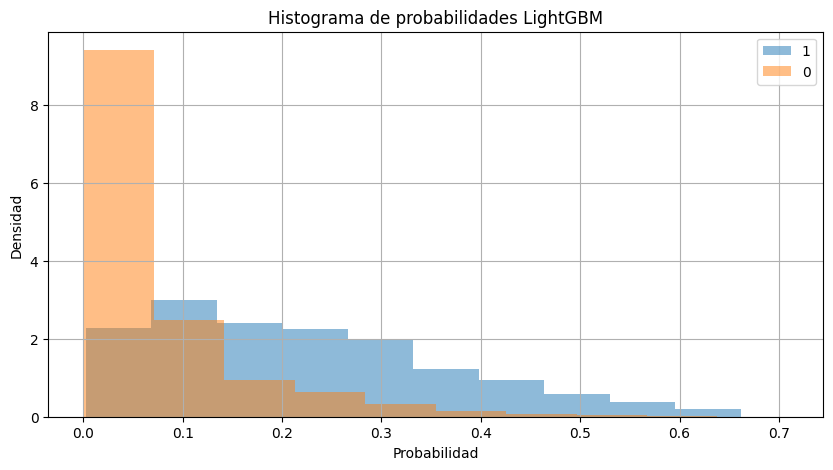

AUC S learn: 0.8372042590806814


In [2069]:
predicciones_Slearner=Slearner(X_train, y_train, X_test, y_test)

### T learner

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.855771	training's binary_logloss: 0.187729
[400]	training's auc: 0.861726	training's binary_logloss: 0.184865
[600]	training's auc: 0.866604	training's binary_logloss: 0.182238
[800]	training's auc: 0.870259	training's binary_logloss: 0.180455
[1000]	training's auc: 0.87339	training's binary_logloss: 0.178853


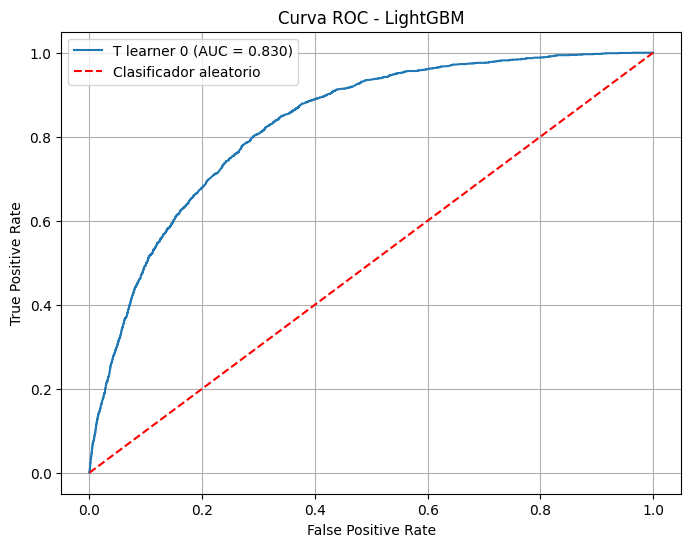

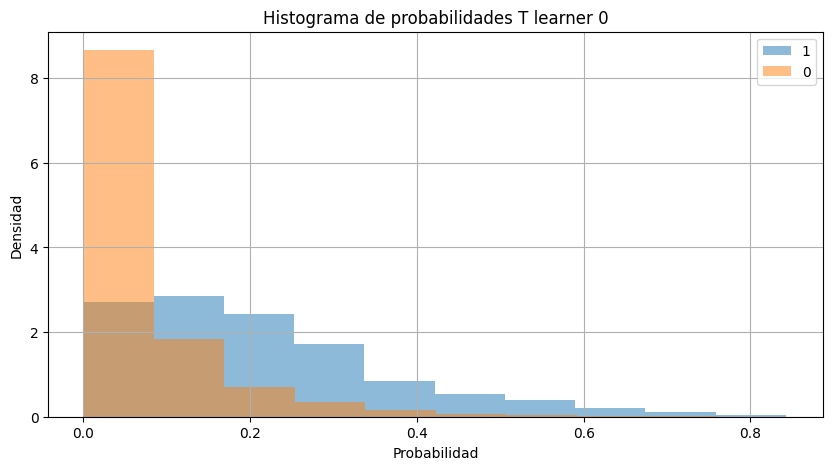

AUC T learner 0: 0.830192799742848
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.811193	training's binary_logloss: 0.305718
[400]	training's auc: 0.822222	training's binary_logloss: 0.299166
[600]	training's auc: 0.833347	training's binary_logloss: 0.292671
[800]	training's auc: 0.839965	training's binary_logloss: 0.288467
[1000]	training's auc: 0.845345	training's binary_logloss: 0.284626


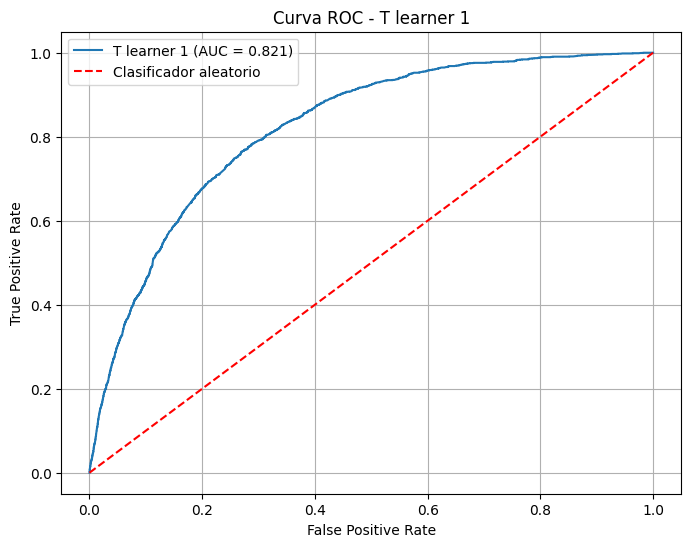

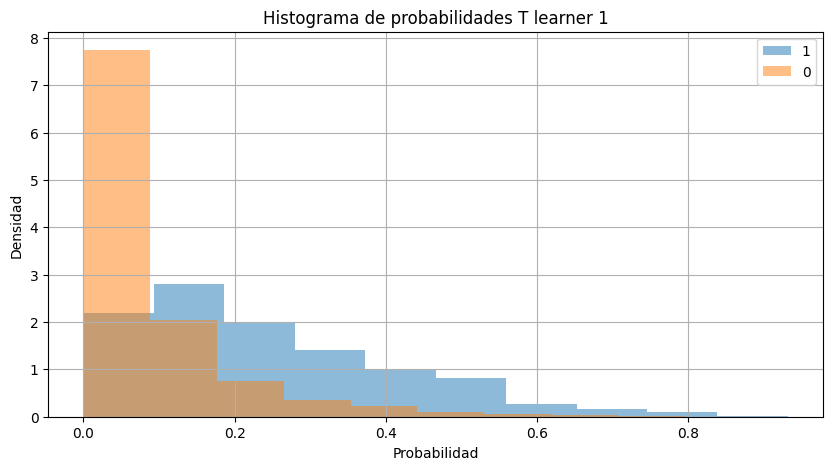

AUC T learner 1: 0.8210422372227579


,treatment0,treatment1,cate,diabetes_%
bin_cate,,,,
1,0.144043,0.095785,-0.048258,0.133500
2,0.017211,0.015156,-0.002055,0.018146
3,0.031020,0.036689,0.005669,0.034188
4,0.063648,0.086378,0.022731,0.066900
5,0.137400,0.241688,0.104288,0.172552


count    20000.000000
mean         0.016436
std          0.067184
min         -0.574887
25%         -0.003463
50%          0.005196
75%          0.027894
max          0.789377
Name: cate, dtype: float64

In [2070]:
auc_Tlearner_0, auc_Tlearner_1=Tlearner(X_train, y_train, X_test, y_test)

### X learner

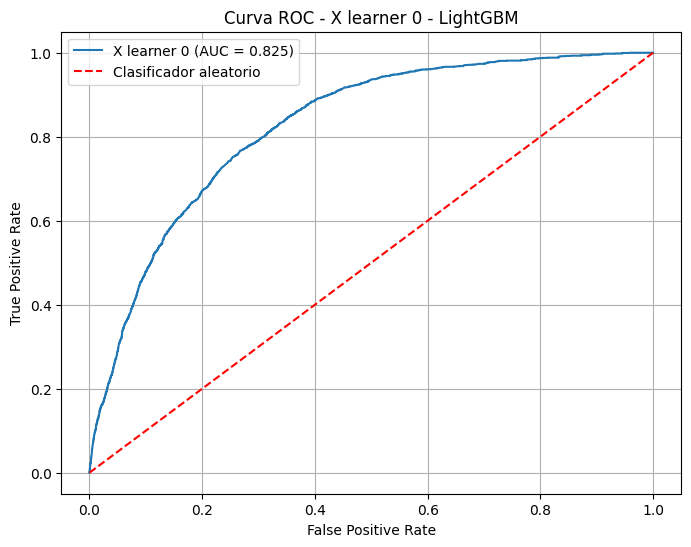

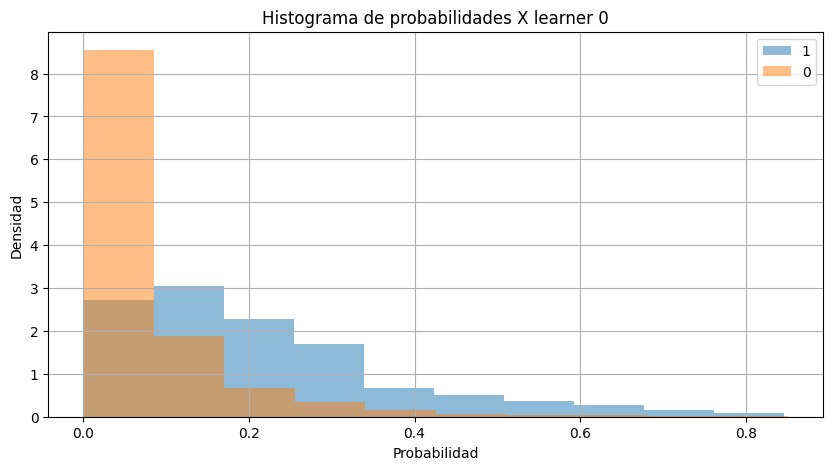

AUC X learner 0: 0.8247246705239473


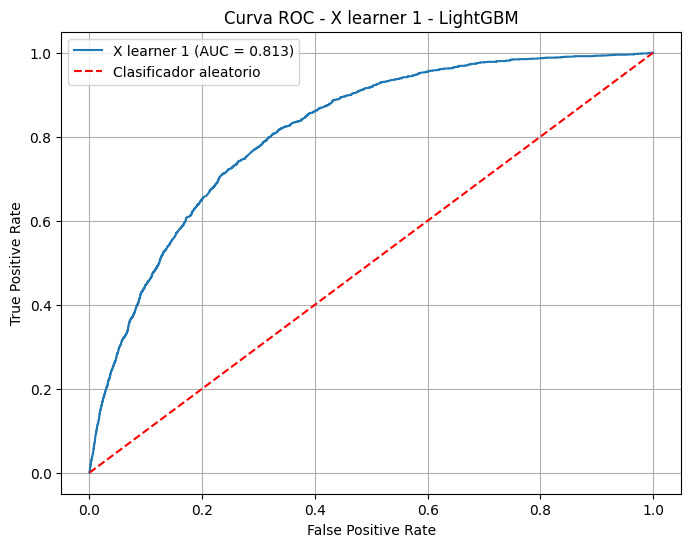

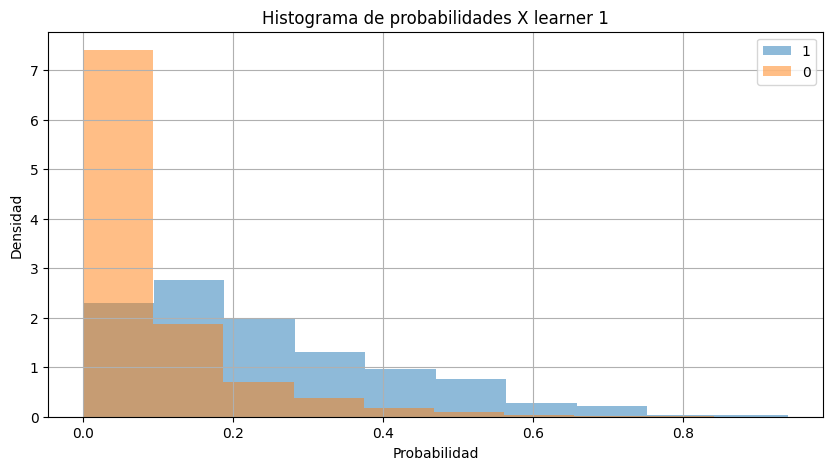

AUC X learner 1: 0.813067743490839
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.694662	training's binary_logloss: 0.542159	valid_1's auc: 0.687232	valid_1's binary_logloss: 0.54349
Early stopping, best iteration is:
[165]	training's auc: 0.693122	training's binary_logloss: 0.542786	valid_1's auc: 0.68714	valid_1's binary_logloss: 0.543468


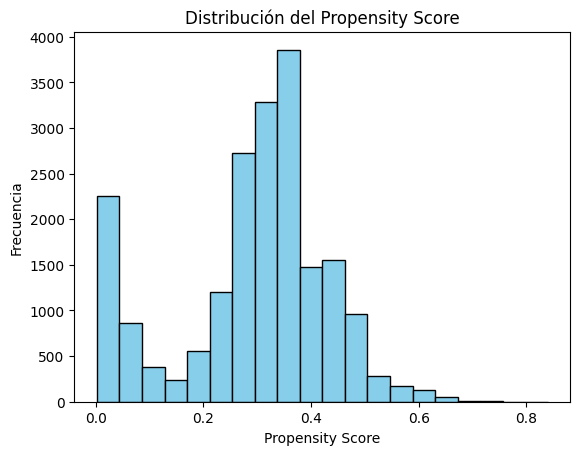

,cate,bin_cate,diabetes_%
0,-0.009132,2,0
1,0.029733,4,0
2,0.071103,5,0
3,0.007793,3,0
4,0.121126,5,0


,cate,diabetes_%
bin_cate,,
1,-0.091466,0.131217
2,-0.011659,0.042622
3,0.007791,0.038626
4,0.033047,0.058735
5,0.145557,0.153788


count    20000.000000
mean         0.016632
std          0.098984
min         -1.044964
25%         -0.016584
50%          0.008103
75%          0.042182
max          1.030388
Name: cate, dtype: float64

In [2073]:
auc_Xlearner_0, auc_Xlearner_1 =Xlearner(X_train, y_train, X_test, y_test)

---

## **AUC**

#### **Hr_role** 

In [2074]:
AUC_Hr = pd.DataFrame({
    'LightGBM': [predicciones_LGBM],
    'ShapLGBM': [predicciones_ShapLGBM],
    'PCA_LGBM': [predicciones_PCALGBM],

}, index=['AUC Hr_role'])

AUC_Hr


,LightGBM,ShapLGBM,PCA_LGBM
AUC Hr_role,0.80429,0.80429,0.623008


#### **Diabetes**

In [2077]:
AUC_Diabetes = pd.DataFrame({
    'S learn': [predicciones_Slearner],
    'T learn_0': [auc_Tlearner_0],
    'T learn_1': [auc_Tlearner_1],
    'X learn_0': [auc_Xlearner_0],
    'X learn_1': [auc_Xlearner_1],
}, index=['AUC Diabetes'])

AUC_Diabetes

,S learn,T learn_0,T learn_1,X learn_0,X learn_1
AUC Diabetes,0.837204,0.830193,0.821042,0.824725,0.813068


---


## **Conclusión**